In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# --- Load Data ---
df = pd.read_csv("demodata.csv")


In [5]:
# Convert Date
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')


# Fill Status & Create 'Arrived'
df['Status'] = df['Status'].fillna('')
arrival_status = ['Completed', 'Overbook']
df['Arrived'] = df['Status'].str.contains('|'.join(arrival_status), case=False).astype(int)


In [7]:
# Assign Amount
def assign_amount(status):
    status = str(status).lower()
    if 'overbook' in status:
        return 50
    elif 'completed' in status:
        return 75
    else:
        return 0
df['Amount'] = df['Status'].apply(assign_amount)


In [10]:
# Add DayOfWeek & WeekNumber
df['DayOfWeek'] = df['Date'].dt.day_name()
df['WeekNumber'] = df['Date'].dt.isocalendar().week

In [11]:
# Select Features & Encode
features = ['Age group', 'Gender', 'Amount', 'DayOfWeek', 'WeekNumber']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Arrived']


In [12]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importance)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00        26

    accuracy                           1.00       894
   macro avg       1.00      1.00      1.00       894
weighted avg       1.00      1.00      1.00       894


Feature Importance:
                                  Feature  Importance
0                                 Amount    0.958827
1                             WeekNumber    0.024300
2                  Age group_30-49 years    0.005159
4                            Gender_Male    0.003038
6                          Gender_female    0.002655
3                    Age group_50+ years    0.001461
10                     DayOfWeek_Tuesday    0.001271
8                       DayOfWeek_Monday    0.001166
11                   DayOfWeek_Wednesday    0.001146
9                     DayOfWeek_Thursday    0.000930
7                            Gender_male    0.000024
5

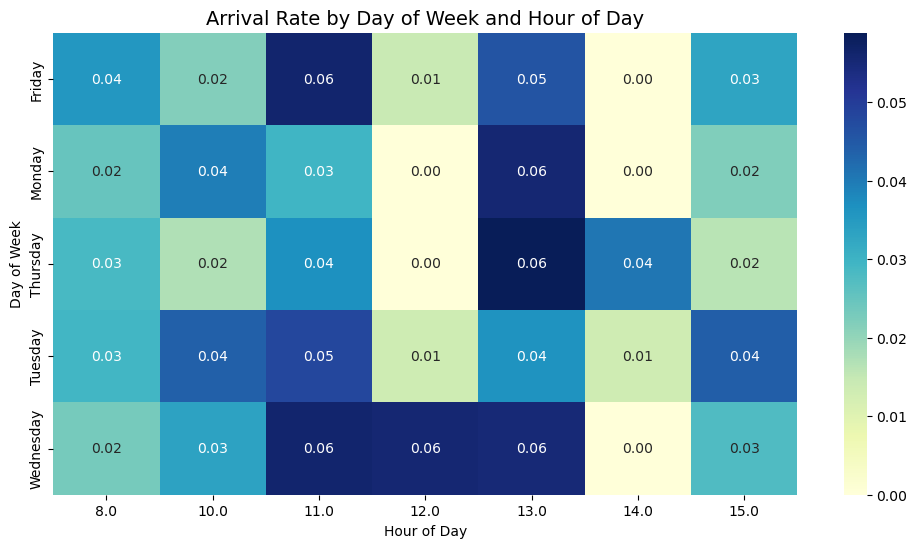

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Time to hour of day
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# Group by Day and Hour for arrivals
arrival_trends = df.groupby(['DayOfWeek', 'Hour'])['Arrived'].mean().reset_index()

# Order days of week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arrival_trends['DayOfWeek'] = pd.Categorical(arrival_trends['DayOfWeek'], categories=days_order, ordered=True)

# Create a pivot table for heatmap
pivot_table = arrival_trends.pivot(index="DayOfWeek", columns="Hour", values="Arrived")

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Arrival Rate by Day of Week and Hour of Day", fontsize=14)
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()


C:\Users\Vostro\AppData\Local\Temp\ipykernel_29996\1545347008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_avg, x='DayOfWeek', y='Arrived', palette='Blues_d')


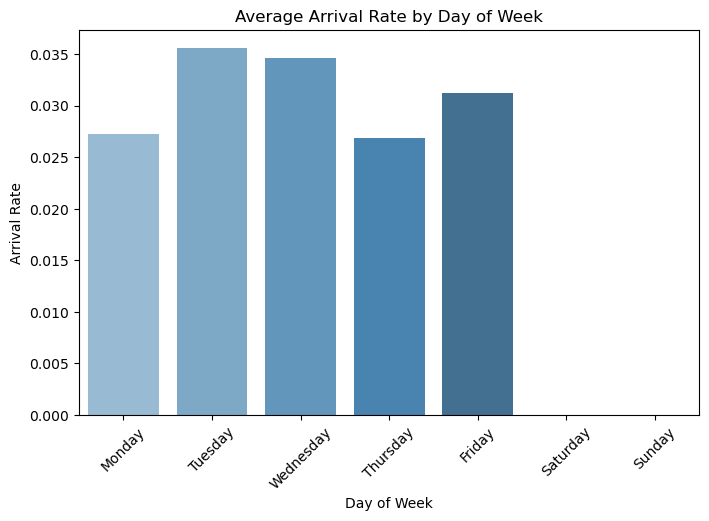

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average arrival rate by day
day_avg = df.groupby('DayOfWeek')['Arrived'].mean().reset_index()

# Order days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_avg['DayOfWeek'] = pd.Categorical(day_avg['DayOfWeek'], categories=days_order, ordered=True)

plt.figure(figsize=(8,5))
sns.barplot(data=day_avg, x='DayOfWeek', y='Arrived', palette='Blues_d')
plt.title("Average Arrival Rate by Day of Week")
plt.ylabel("Arrival Rate")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()


C:\Users\Vostro\AppData\Local\Temp\ipykernel_29996\3468496371.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_avg, x='Hour', y='Arrived', palette='Greens_d')


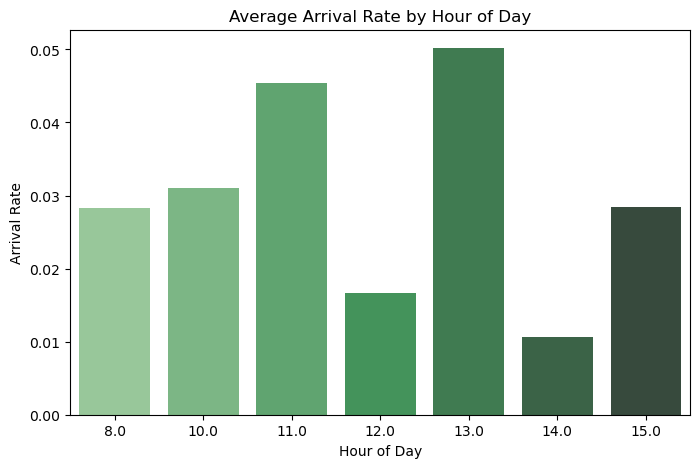

In [18]:
# Make sure Time is datetime
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# Average arrival rate by hour
hour_avg = df.groupby('Hour')['Arrived'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=hour_avg, x='Hour', y='Arrived', palette='Greens_d')
plt.title("Average Arrival Rate by Hour of Day")
plt.ylabel("Arrival Rate")
plt.xlabel("Hour of Day")
plt.show()
